In [135]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [136]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [137]:
NUM_CLASSES = 11

# Dataset reading

In [138]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [139]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

# Model building

In [141]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [142]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_22 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,547 (21.67 KB)

 Trainable params: 5,547 (21.67 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [144]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [145]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


18/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0549 - loss: 2.4956 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0670 - loss: 2.4705 - val_accuracy: 0.2232 - val_loss: 2.3435
Epoch 2/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1604 - loss: 2.3509
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1614 - loss: 2.3486 - val_accuracy: 0.2860 - val_loss: 2.2459
Epoch 3/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2160 - loss: 2.2429
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2163 - loss: 2.2419 - val_accuracy: 0.2990 - val_loss: 2.0627
Epoch 4/1000
26/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2450 - loss: 2.1292
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━

In [146]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9165 - loss: 0.3858


In [147]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [148]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[0.00206996 0.0126012  0.41194817 0.01763439 0.01280337 0.00716313
 0.015586   0.03655524 0.39298642 0.07127999 0.01937215]
2


# Confusion matrix

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


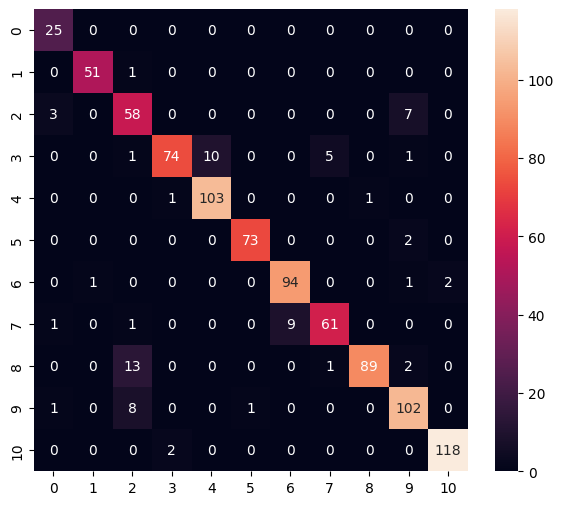

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.98      0.98      0.98        52
           2       0.71      0.85      0.77        68
           3       0.96      0.81      0.88        91
           4       0.91      0.98      0.94       105
           5       0.99      0.97      0.98        75
           6       0.91      0.96      0.94        98
           7       0.91      0.85      0.88        72
           8       0.99      0.85      0.91       105
           9       0.89      0.91      0.90       112
          10       0.98      0.98      0.98       120

    accuracy                           0.92       923
   macro avg       0.91      0.92      0.92       923
weighted avg       0.92      0.92      0.92       923



In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [150]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [151]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\barun\AppData\Local\Temp\tmpguzgksep\assets


INFO:tensorflow:Assets written to: C:\Users\barun\AppData\Local\Temp\tmpguzgksep\assets


Saved artifact at 'C:\Users\barun\AppData\Local\Temp\tmpguzgksep'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_7')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  2031890944592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031890949008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031890947856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031890945744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031890948240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031890942864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031927427536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2031927428688: TensorSpec(shape=(), dtype=tf.resource, name=None)


11688

# Inference test

In [152]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [153]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [154]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [155]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [156]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00240315 0.01236084 0.42949933 0.01563862 0.0114095  0.00667256
 0.01649708 0.03809071 0.368358   0.07887979 0.02019049]
2
